In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# reading in the normalized dataset 
data = pd.read_csv('final_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,state_0,state_1,state_2,state_3,state_4,state_5,state_6,status_0,...,status_3,status_4,months,pay_method_ACH,pay_method_Other,pay_method_credit card,pay_method_paper check,income,lp_amount,Y
0,0,2014.0,0,0,0,0,0,0,1,0,...,0,1,0.87,0,0,1,0,0.459624,0.500,0
1,1,2015.0,0,0,0,0,0,0,1,0,...,0,1,0.00,0,0,1,0,0.459624,0.375,0
2,2,2016.0,0,0,0,0,0,0,1,0,...,1,0,0.00,0,0,1,0,0.459624,0.375,0
3,3,2016.0,0,0,0,0,0,0,1,0,...,0,1,0.67,0,0,1,0,0.459624,0.625,0
4,4,2014.0,0,0,0,0,0,0,1,0,...,1,1,0.57,0,0,1,0,0.619935,0.500,0


In [3]:
# Creating a separate dataframe for the dropped columns that can't be used in a logistic regression
data_dropped = data[['months']]

# Dropping rows that will not be used in the logistic regression
data = data.drop(['Unnamed: 0', 'months'], axis = 1)

In [4]:
# Splitting the dataset into the features and target variables
X = data.iloc[:,:-1]
y = data['Y']

# Splitting the data using the train_test_split sklearn package
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [5]:
# Creating variable for RandomOverSampling
rando_sampl = RandomOverSampler(random_state=2019)
X_train_ros, y_train_ros = rando_sampl.fit_resample(X_train, y_train)

In [6]:
# Starting to build the parameters of the model
logreg = LogisticRegression(solver='liblinear', class_weight = 'balanced')

# Fitting the model using the training data
logreg = logreg.fit(X_train_ros, y_train_ros)

# Creating the y2_pred variable
y_pred = logreg.predict(X_test)

# Creating the confusion matrix for the regression
cnf_mat2 = metrics.confusion_matrix(y_test, y_pred)
cnf_mat2

array([[14772,  8891],
       [   78,  2820]])

Text(0.5, 257.44, 'Predicted')

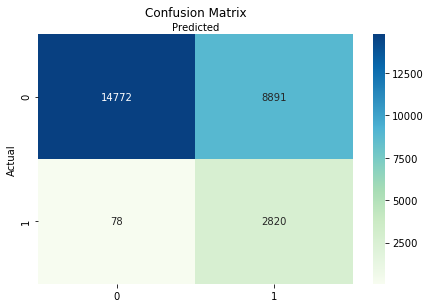

In [7]:
# Visualizing the confusion matrix of the balanced dataset to make it easier to view
names = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(names))
plt.xticks(ticks, names)
plt.yticks(ticks, names)

sns.heatmap(pd.DataFrame(cnf_mat2), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [8]:
# Printing the accuracy, precision, and recall for the balanced dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6623244606754264
Precision: 0.24079924856972076
Recall: 0.9730848861283644
F1 Score: 0.7255417861182307


In [9]:
# Running the trained model on the training and test data to make sure the model is not overfitting

# Running accuracy on both sets
print("Train Accuracy:",metrics.accuracy_score(y_train, logreg.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Running precision on both sets
print("Train Precision:",metrics.precision_score(y_train, logreg.predict(X_train)))
print("Test Precision:",metrics.precision_score(y_test, y_pred))

# Running recall on both sets
print("Train Recall:",metrics.recall_score(y_train, logreg.predict(X_train)))
print("Test Recall:",metrics.recall_score(y_test, y_pred))

#Running f1 score on both sets
print("Train F1:",metrics.f1_score(y_train, logreg.predict(X_train), average='weighted'))
print("Test F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Train Accuracy: 0.6560829296453402
Test Accuracy: 0.6623244606754264
Train Precision: 0.2335924736634556
Test Precision: 0.24079924856972076
Train Recall: 0.9770263901979265
Test Recall: 0.9730848861283644
Train F1: 0.7214187879397607
Test F1: 0.7255417861182307
